<a href="https://colab.research.google.com/github/rranjithkumar100/AI-Training/blob/main/Day_25_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from google.colab import files


In [3]:
uploaded = files.upload()

Saving regression_table.csv to regression_table.csv


In [4]:
df = pd.read_csv("regression_table.csv")

In [5]:
df.head()

,X,Y
0,-50.0000,-0.433374
1,-49.8999,0.526711
2,-49.7998,-0.632832
3,-49.6997,-0.235546
4,-49.5996,-0.892942


In [6]:
df.count()

,0
X,1000
Y,1000


In [ ]:
df.tail()

,X,Y
995,49.5996,0.258723
996,49.6997,0.222712
997,49.7998,0.102051
998,49.8999,-0.696911
999,50.0000,0.489715


In [ ]:
df.shape

(1000, 2)

In [ ]:
df.isnull().sum()

,0
X,0
Y,0


In [ ]:
df.iloc[230:250]

,X,Y
230,-26.976977,0.761164
231,-26.876877,-0.042654
232,-26.776777,-0.413272
233,-26.676677,-0.225105
234,-26.576577,-0.319341
235,-26.476476,0.244463
236,-26.376376,-1.016398
237,-26.276276,-0.880990
238,-26.176176,-1.275077
239,-26.076076,-0.714633


In [7]:
from sklearn.model_selection import train_test_split


In [8]:
x = df[['X']]
y = df[['Y']]


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=17)


In [10]:
from sklearn.linear_model import LinearRegression


In [11]:
lr = LinearRegression()


In [12]:
lr.fit(x_train, y_train)


LinearRegression()

In [13]:
y_predict = lr.predict(x_test)


In [14]:
y_predict

array([[ 0.25092907],
       [-0.04669942],
       [ 0.40026184],
       [-0.33914274],
       [ 0.26855864],
       [-0.49262364],
       [ 0.27581787],
       [-0.46254968],
       [ 0.45522459],
       [-0.48329034],
       [ 0.23952171],
       [-0.19292108],
       [ 0.07878158],
       [ 0.39403964],
       [ 0.33700282],
       [-0.38995736],
       [-0.26032823],
       [-0.10166217],
       [ 0.0321151 ],
       [-0.10373624],
       [ 0.06530015],
       [ 0.14618873],
       [-0.03218095],
       [ 0.26233644],
       [ 0.3961137 ],
       [-0.08195854],
       [-0.1213658 ],
       [-0.40758692],
       [-0.31943911],
       [-0.2250691 ],
       [ 0.18352192],
       [ 0.0227818 ],
       [ 0.0041152 ],
       [ 0.1295962 ],
       [ 0.17107753],
       [-0.41692022],
       [-0.38684626],
       [-0.15351382],
       [ 0.32248436],
       [-0.35366121],
       [-0.15766196],
       [-0.42003132],
       [ 0.03937433],
       [ 0.10678148],
       [ 0.0196707 ],
       [-0

In [15]:
import matplotlib.pyplot as plt


<ipython-input-16-2353603d63ad>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


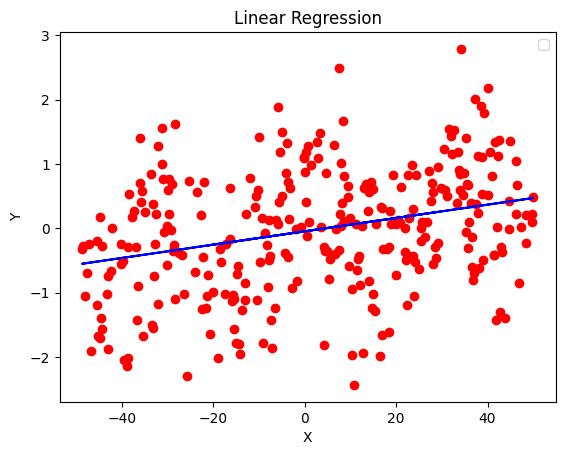

In [16]:

plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_predict, color='blue')

plt.xlabel('X')
plt.ylabel('Y')

plt.title('Linear Regression')
plt.legend()
plt.show()


In [17]:
# Polynomial regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures


Coefficients: [[ 3.58361364e-03  6.08474787e-04  1.66817931e-05 -3.27932763e-07
  -6.72504151e-09]]
Intercept: [-0.13582206]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


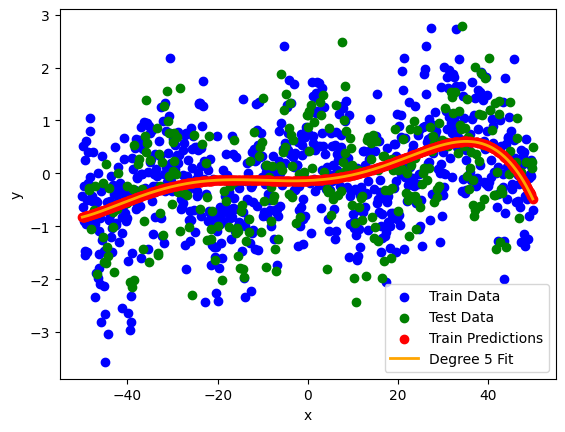

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Define the degree of the polynomial
degree = 5  # Adjust as needed

# Create polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(x_poly_train, y_train)

# Make predictions
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Visualization
plt.scatter(x_train, y_train, color="blue", label="Train Data")
plt.scatter(x_test, y_test, color="green", label="Test Data")
plt.scatter(x_train, y_train_pred, color="red", label="Train Predictions")

# Smooth curve for the polynomial fit
x_fit = np.linspace(x_train.min(), x_train.max(), 500).reshape(-1, 1)
x_fit_poly = poly.transform(x_fit)
y_fit = model.predict(x_fit_poly)
plt.plot(x_fit, y_fit, color="orange", linewidth=2, label=f"Degree {degree} Fit")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
